In [74]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

**1.1**

In [41]:
def get_uniform_means(n_experiments, n_samples):
    return [np.mean(np.random.uniform(0, 1, size=n_samples)) for _ in range(n_experiments)]

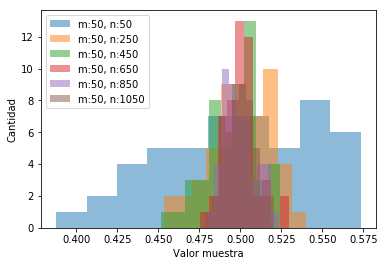

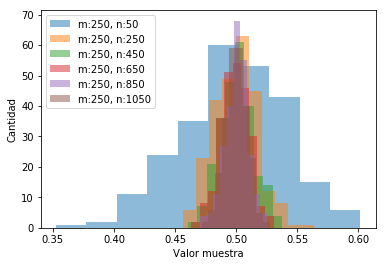

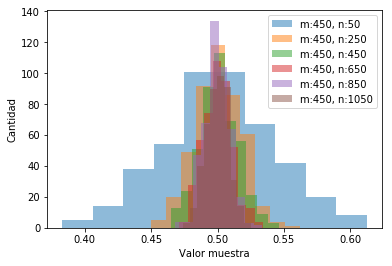

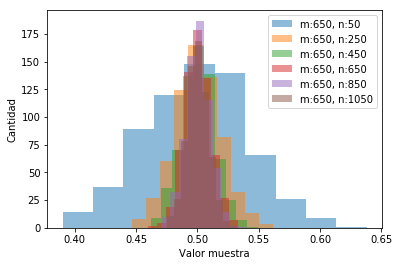

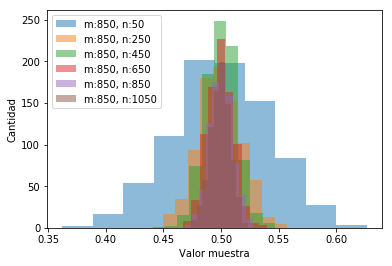

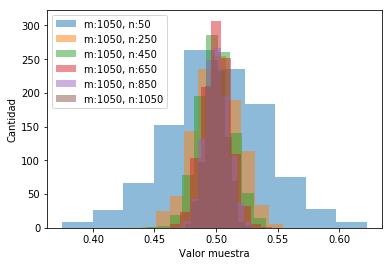

In [73]:
for n_exp in range(50, 1051, 200):
    legends = []
    plt.figure()
    for n_samp in range(50, 1051, 200):
        means = get_uniform_means(n_exp, n_samp)
        plt.hist(means, alpha=0.5)
        legends.append(f'm:{n_exp}, n:{n_samp}')
        plt.legend(legends)
        plt.xlabel('Valor muestra')
        plt.ylabel('Cantidad')

Llamo cantidad de muestras (n_samples) a la cantidad de veces que obtengo un número aleatorio, y cantidad de experimentos (n_experiments) a la cantidad de veces que realizo la obtención de esas muestras. 

Como se puede observar, a mayor $m$ (n_experiments), y a mayor $n$ (n_samples), los efectos son similares, se obtienen cada vez valores más "normales", y esto concuerda con lo planteado sobre la cantidad de datos. En el fondo, a mayor cantidad de datos, mayor la cercanía a la normal. Se puede ver como una matriz, en la cual se agranda una de las dos dimensiones, y que el promedio de los datos, a mayor cantidad, es más cercano a lo esperado, independiente de si es una o la otra dimensión, pero es claro que el mejor resultado es al tener ambas con los mayores valores.

**1.2**

In [77]:
def get_dice_means(n_experiments, n_samples):
    return [np.mean(np.random.randint(1, 7, size=n_samples)) for _ in range(n_experiments)]

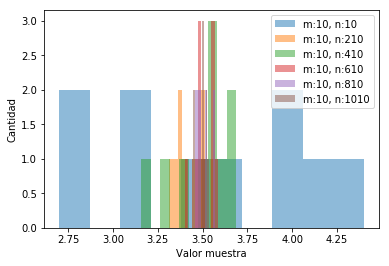

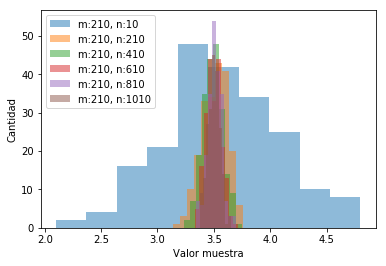

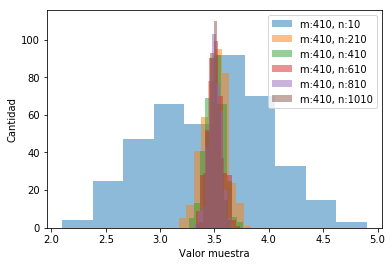

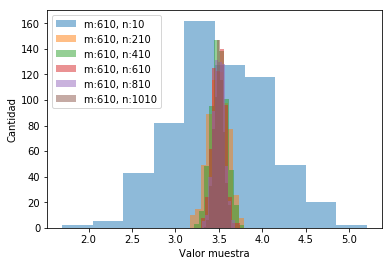

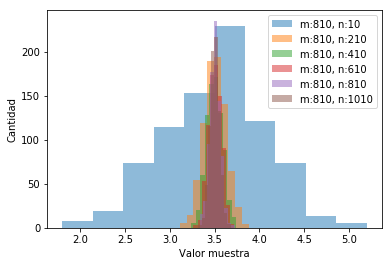

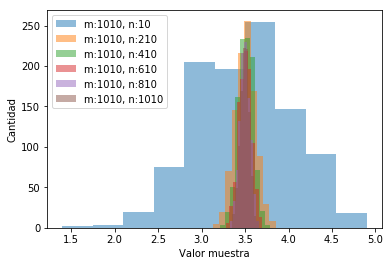

In [78]:
for n_exp in range(10, 1011, 200):
    legends = []
    plt.figure()
    for n_samp in range(10, 1011, 200):
        means = get_dice_means(n_exp, n_samp)
        plt.hist(means, alpha=0.5)
        legends.append(f'm:{n_exp}, n:{n_samp}')
        plt.legend(legends)
        plt.xlabel('Valor muestra')
        plt.ylabel('Cantidad')

La conclusión de repetir el mismo experimento sin cargar, es que pasa lo mismo, porque a gran cantidad de datos deja de importar la distribución de los datos iniciales.

Ahora con el dado cargado:

In [99]:
probs = [1/12, 1/12, 1/12, 1/12, 1/6, 1/2]
values = list(range(1, 7))

Lo que hago es declarar un vector de probabilidades que "carga" la elección de valores para el dado.

In [106]:
def get_unfair_dice_means(n_experiments, n_samples):
    return [np.mean(np.random.choice(values, p=probs, size=n_samples)) for _ in range(n_experiments)]

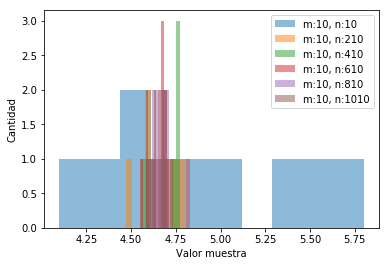

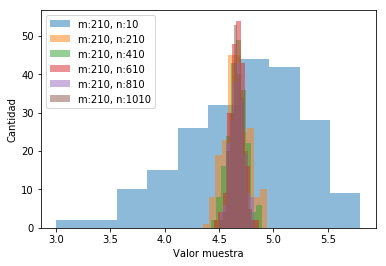

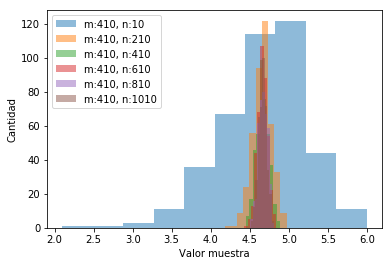

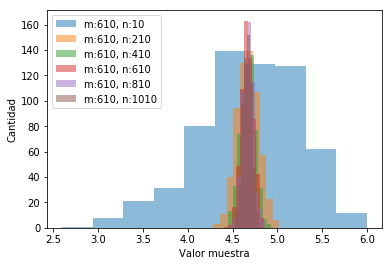

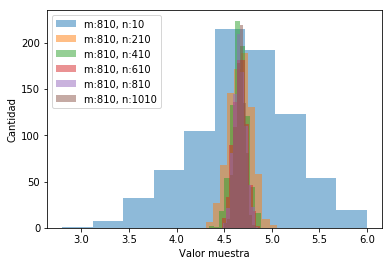

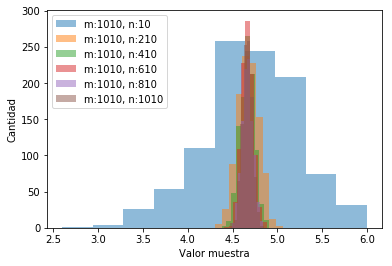

In [107]:
for n_exp in range(10, 1011, 200):
    legends = []
    plt.figure()
    for n_samp in range(10, 1011, 200):
        means = get_unfair_dice_means(n_exp, n_samp)
        plt.hist(means, alpha=0.5)
        legends.append(f'm:{n_exp}, n:{n_samp}')
        plt.legend(legends)
        plt.xlabel('Valor muestra')
        plt.ylabel('Cantidad')

Al cargar el dado, se observa que se desplaza la media pero el análisis anterior sigue siendo válido, y parece distribuir normal, en grandes cantidades de datos.

**2.1** y **2.2**

In [171]:
def generate_mean(n):
    return np.random.uniform(0, 10, size=n)

def generate_cov_matrix():
    variances = np.random.uniform(0, 10, size=2)
    matrix = [[0, 0], [0, 0]]
    limit = np.sqrt(variances[0] * variances[1])
    matrix[0][0] = variances[0]
    matrix[1][1] = variances[1]
    matrix[0][1] = matrix[1][0] = np.random.uniform(-limit, limit)
    return matrix
    

In [173]:
mean = generate_mean(2)
cov = generate_cov_matrix()

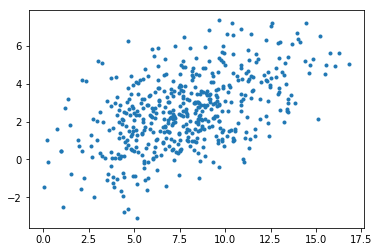

In [207]:
x0, y0 = np.random.multivariate_normal(mean, cov, 500).T
plt.plot(x0, y0, '.')
plt.show()

Como se observa, al ser pocos puntos, se tiende a esa forma de elipse inclinada, pero se puede hacer con más puntos para verla más precisamente.

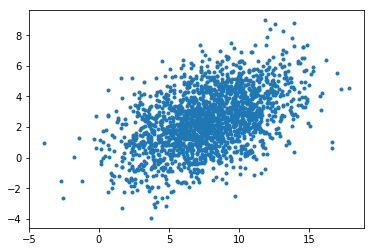

In [208]:
x1, y1 = np.random.multivariate_normal(mean, cov, 2000).T
plt.plot(x1, y1, '.')
plt.show()

In [199]:
from scipy.stats import multivariate_normal
rv = multivariate_normal(mean, cov)

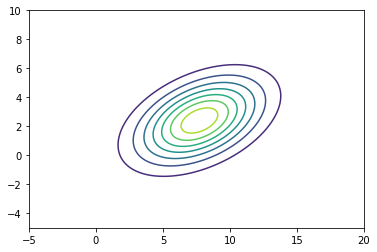

In [205]:
x, y = np.mgrid[-5:20:.01, -5:10:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
plt.contour(x, y, rv.pdf(pos))
plt.show()

Ahora se puede ver el gráfico de la PDF, y se ve que la forma en líneas generales es muy similar, tanto en orientación como en distribución de los puntos. Si además ponemos las dos juntas, podemos ver que en líneas generales calzan bastante las formas.

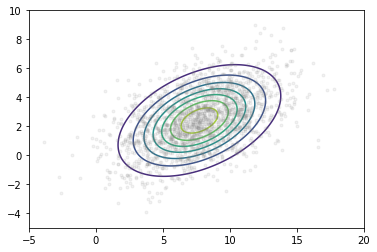

In [213]:
plt.plot(x1, y1, '.', alpha=0.1, color='gray')
plt.contour(x, y, rv.pdf(pos))
plt.show()

**2.2**

Condicionando en 3 valores para y:

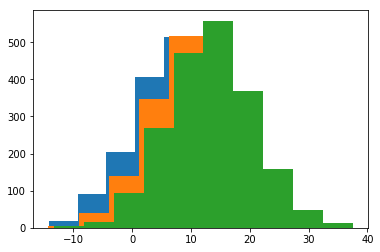

In [224]:
for y_condition in [3, 7, 11]:
    new_mean = mean[0] + cov[0][1] / cov[1][1] * (y_condition - mean[1])
    new_cov = cov[0][0] - cov[0][1] / cov[1][1] * cov[0][1]
    x3 = np.random.normal(new_mean, new_cov, 2000).T
    plt.hist(x3)

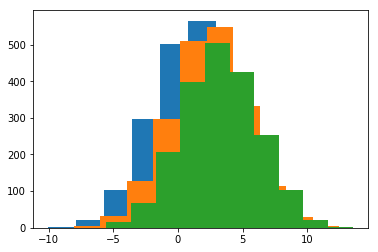

In [223]:
for x_condition in [3, 7, 11]:
    new_mean = mean[1] + cov[0][1] / cov[0][0] * (x_condition - mean[0])
    new_cov = cov[1][1] - cov[0][1] / cov[0][0] * cov[0][1]
    x4 = np.random.normal(new_mean, new_cov, 2000).T
    plt.hist(x4)

Como se observa, a distintos cortes, en distintos valores de x e y, se observa que la forma del histograma varía según el valor mismo, lo que hace sentido con la "altura" a la que se encuentra el corte. También se aprecia que en uno de los dos ejes los cortes son más significativos (generan más cambios en los histogramas) y eso tiene sentido por la forma de la pdf apreciada en el gráfico anterior (en el ejemplo varió más en x, pero puede pasar que con otros valores se de otro comportamiento)